In [1]:
from torchvision import datasets
from ipywidgets import IntProgress
import torch
data_folder = '/data/FMNIST' # This can be any directory you want 
# to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

0it [00:00, ?it/s]

Extracting /home/carlsec/data/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /home/carlsec/data/FMNIST/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting /home/carlsec/data/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /home/carlsec/data/FMNIST/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting /home/carlsec/data/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /home/carlsec/data/FMNIST/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting /home/carlsec/data/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /home/carlsec/data/FMNIST/FashionMNIST/raw
Processing...
Done!


/home/carlsec/anaconda3/envs/carl38/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [2]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [3]:
unique_values = tr_targets.unique()
print(f'tr_images & tr_targets:\n\tX -{tr_images.shape}\n\tY \
-{tr_targets.shape}\n\tY-Unique Values : {unique_values}')
print(f'TASK:\n\t{len(unique_values)} class Classification')
print(f'UNIQUE CLASSES:\n\t{fmnist.classes}') 

tr_images & tr_targets:
	X -torch.Size([60000, 28, 28])
	Y -torch.Size([60000])
	Y-Unique Values : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TASK:
	10 class Classification
UNIQUE CLASSES:
	['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

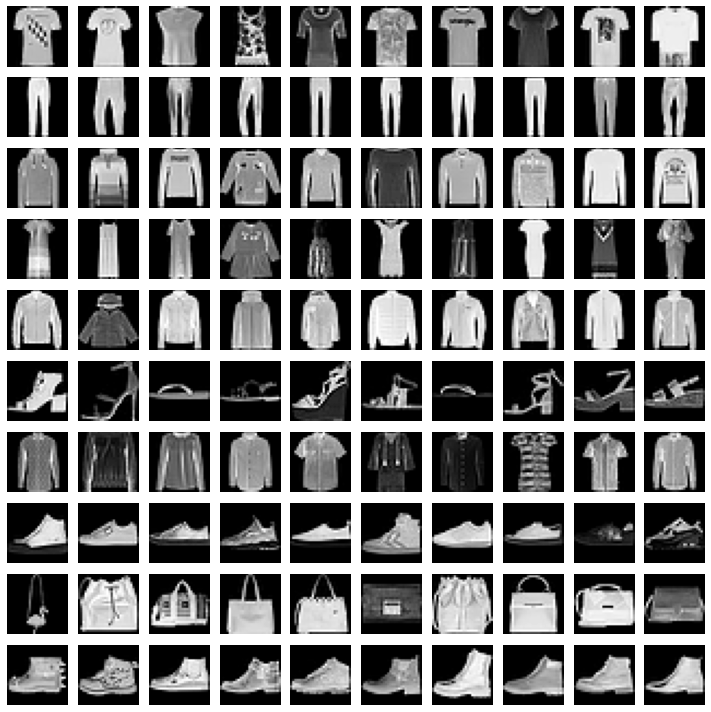

In [5]:
R, C = len(tr_targets.unique()), 10
fig, ax = plt.subplots(R, C, figsize=(10,10))
for label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets == label_class)[0]
    for plot_cell in plot_row:
        plot_cell.grid(False); plot_cell.axis('off')
        ix = np.random.choice(label_x_rows)
        x, y = tr_images[ix], tr_targets[ix]
        plot_cell.imshow(x, cmap='gray')
plt.tight_layout()